# Development of functions to calculate solutions to Teukolsky's homegeneous radial equation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


(__validate_inputs__)>> Not using NR convention for organizing solution space and setting the sign of the QNM freuency imaginary part.
(__leaver_helper__)>> NOT using NR convention for organizing solution space and setting the sign of the QNM freuency imaginary part.
(__leaver_helper__)>> Loading: /Users/book/JOKI/Libs/KOALA/positive_dev/positive/data/kerr/l2/n0l2m2.dat
(__leaver_helper__)>> Check Passed:Frequency and separation const. satisfy Leaver's equations with (l,m)=(2,2). Zero is approx 1.52e-07.
(test_slm)>> Check Passed: This object's spheroidal harmonic solves Teukolsky's angular equation with zero approximated by 2.38e-10.
0.5 0.475 [ 0.65615618 31.56886504]
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 3.97e-07.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x127f93710>,
      dtype=object)

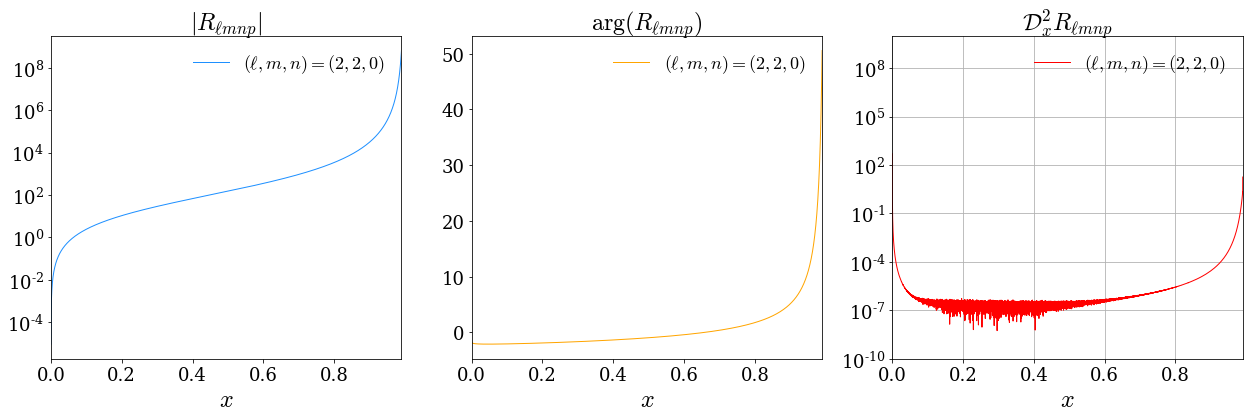

In [54]:
l,m = 2,2
a=0.95
M = 1
# --
n = 0

foo = qnmobj(M,a,l,m,n,verbose=True,use_nr_convention=False,calc_rlm=True,__DEVELOPMENT__=True)

foo.plot_rlm()

0.5 0.475 [ 0.65615618 31.56886504]
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 3.97e-07.


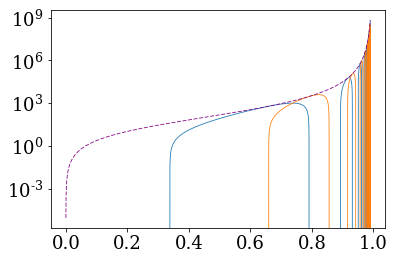

In [55]:
x,R,_ = foo.__calc_rlm__(__DEVELOPMENT__=True)
plot(x,real(R))
plot(x,imag(R))
plot(x, abs(R), color='purple',ls='--')
# plot(x,-abs(R), color='purple',ls='--')
yscale('log')

## Investigate the effect of increasing the number of domain points

In [56]:
# define a list of domain sizes to use
numx_range = [ 2**k for k in range(8,18,2) ]
print numx_range

[256, 1024, 4096, 16384, 65536]


In [57]:
# for each domain size, generate the radial funciton and store for testing 
R_array = []
x_array = []
z_array = []
for numx in numx_range:
    x_,R_,z_ = foo.__calc_rlm__(num_x=numx,__DEVELOPMENT__=True)
    x_array.append(x_)
    R_array.append(R_)
    z_array.append(z_)

0.5 0.475 [ 0.65615618 31.56886504]
(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 1.88e-03.
(test_rlm!)>> There may be a bug: the calculated radial harmonic does not appear to solve Teukolsky's radial equation. The user should decide whether zero is poorly approximated by 1.88e-03.
0.5 0.475 [ 0.65615618 31.56886504]
(test_rlm)>> Check Failed: This object's radial harmonic does not seem to solve Teukolsky's radial equation with zero poorly approximated by 1.16e-04.
(test_rlm!)>> There may be a bug: the calculated radial harmonic does not appear to solve Teukolsky's radial equation. The user should decide whether zero is poorly approximated by 1.16e-04.
0.5 0.475 [ 0.65615618 31.56886504]
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 7.17e-06.
0.5 0.475 [ 0.65615618 31.56886504]
(test_rlm)>> Check Passed: This object's rad

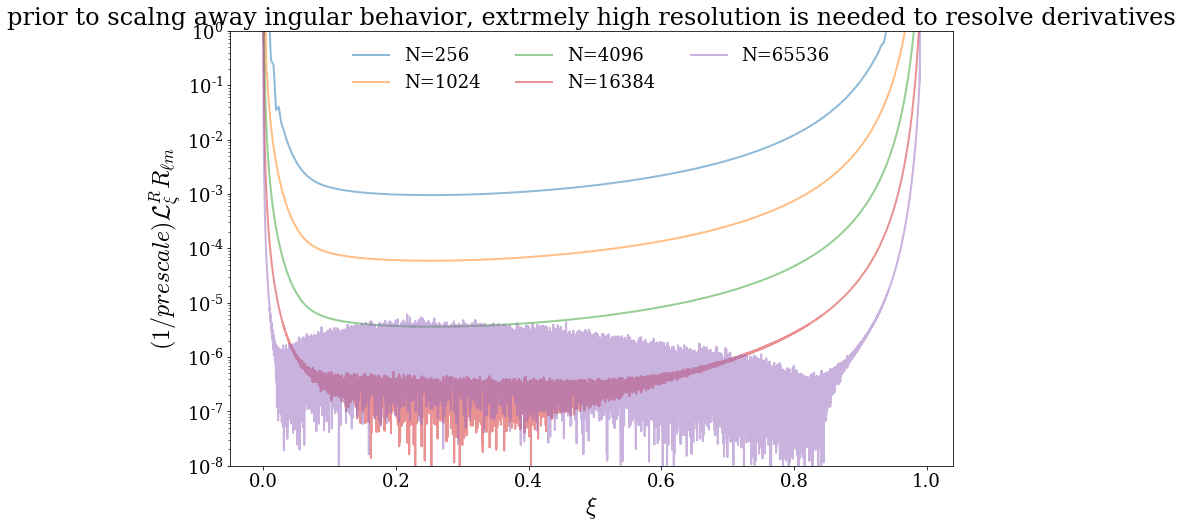

In [58]:

figure( figsize=2*figaspect(0.618) )

for k in range(len(numx_range)):
    plot( x_array[k], abs(z_array[k]),alpha=0.5, label='N='+str(numx_range[k]),lw=2 )
    
yscale('log')
ylim(1e-8,1e0)
legend(ncol=3)
ylabel(r'$(1/prescale)\mathcal{L}_{\xi}^R R_{\ell m}$')
xlabel(r'$\xi$')
title('prior to scalng away ingular behavior, extrmely high resolution is needed to resolve derivatives');

## Plot whether the regularized solution solves its differential equation

In [59]:
# for each domain size, generate the radial funciton and store for testing 
R_array = []
x_array = []
z_array = []
for numx in numx_range:
    x_,R_,z_ = foo.__calc_rlm__(num_x=numx,__DEVELOPMENT__=True,__REGULARIZE__=True)
    x_array.append(x_)
    R_array.append(R_)
    z_array.append(z_)

(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 2.26e-07.
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 1.57e-07.
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 1.53e-07.
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 1.52e-07.
(test_rlm)>> Check Passed: This object's radial harmonic solves Teukolsky's radial equation with zero approximated by 2.13e-07.


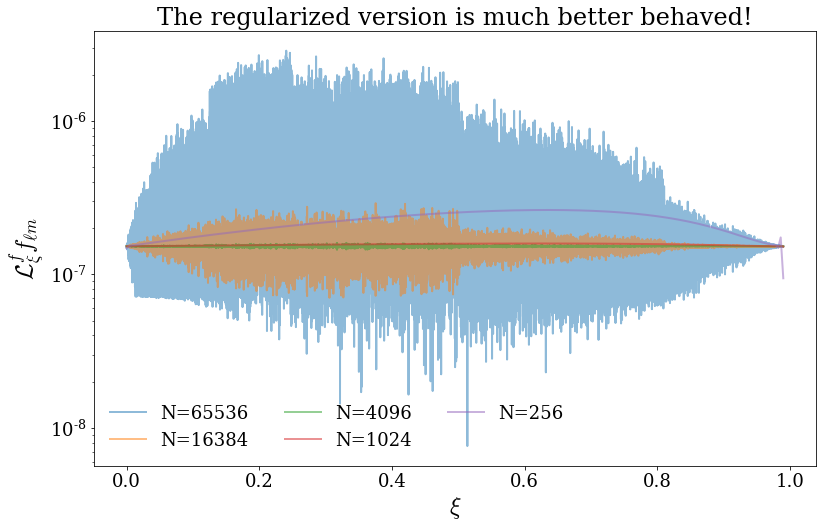

In [60]:
figure( figsize=2*figaspect(0.618) )

for k in range(len(numx_range))[::-1]:
    plot( x_array[k], abs(z_array[k]),alpha=0.5, label='N='+str(numx_range[k]),lw=2 )
    
yscale('log')
# ylim(1e-8,1e0)
legend(ncol=3)
ylabel(r'$\mathcal{L}_{\xi}^f f_{\ell m}$')
xlabel(r'$\xi$');
title('The regularized version is much better behaved!');